# Проект: принятие решений в бизнесе

# Приоритизация гипотез и анализ А/B теста 

## Описание данных
**Данные для первой части**
Файл /datasets/hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
Файл /datasets/orders.csv. Скачать датасет
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**

На основе данных крупного интернет-магазина необходимо: 
- Вместе с отделом маркетинга необходимо подготовить список гипотез для увеличения выручки.
- Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

- С помощью фреймворка ICE приоритезировать гипотезы. Отсортировать их по убыванию приоритета.
- С помощью фреймворка RICE приоритезировать гипотезы. Отсортировать их по убыванию приоритета.
- Оценить, как изменилась приоритизация гипотез при применении RICE вместо ICE.


**Гипотезы**
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 1. Запустить собственную службу доставки, что сократит срок доставки заказов
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 3. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
- 4. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
- 5. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 8. Запустить акцию, дающую скидку на товар в день рождения

## Часть 2. Анализ A/B-теста
Проеведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализировать A/B-тест:

- Построить график кумулятивной выручки по группам. Сделаать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Построить 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Построить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Построить статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Построить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Построить статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

# Предобработка данных 

Изначально загрузим данные, проверим на дубликаты, пропуски, на соответствие форматов данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np

Загрузим данные

In [2]:
#загрузим данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Посмотрим что в данных

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


**Вывод** 

Названия столбцов написаны с большой буквы, при работе это вызовет неудобство. Поэтому приведем все названия к нижнему регистру на этапе предобработки данных

In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


transactionId и visitorId надо привести к нижнему регистру

In [5]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Посмотрим формат данных

In [6]:
#проверим формат данных
print('*** ДАННЫЕ ФАЙЛА hypothesis ***')
hypothesis.info()
print('*** ДАННЫЕ ФАЙЛА orders ***')
orders.info()
print('*** ДАННЫЕ ФАЙЛА visitors ***')
visitors.info()

*** ДАННЫЕ ФАЙЛА hypothesis ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
*** ДАННЫЕ ФАЙЛА orders ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
*** ДАННЫЕ ФАЙЛА visitors ***
<class 'pandas.co

**Вывод** даты в формате object, нужно перевести их в формат даты. Проверим на дубликаты, чтобы обозначить весь список работ для предобработки

In [7]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [8]:
hypothesis.duplicated().sum()

0

In [9]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [12]:
visitors.duplicated().sum()

0

**Вывод** 

Дубликатов, пропусков не обнаружено. Но есть 3 пункта, которые нужно исправить:

- Переведем формат данных 3х файлов даты из object в date
- Переведем все названия стобцов файла hypothesis к нижнему регистру
- Переименовать столбец visitorId и transactionId, исправив Id на id

In [13]:
# исправим формат на datetime64
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
#переведм названия колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [15]:
#переименуем 2 столбца файла orders
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [16]:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


# ЧАСТЬ 1. Приоритизация гипотез

**1.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [17]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


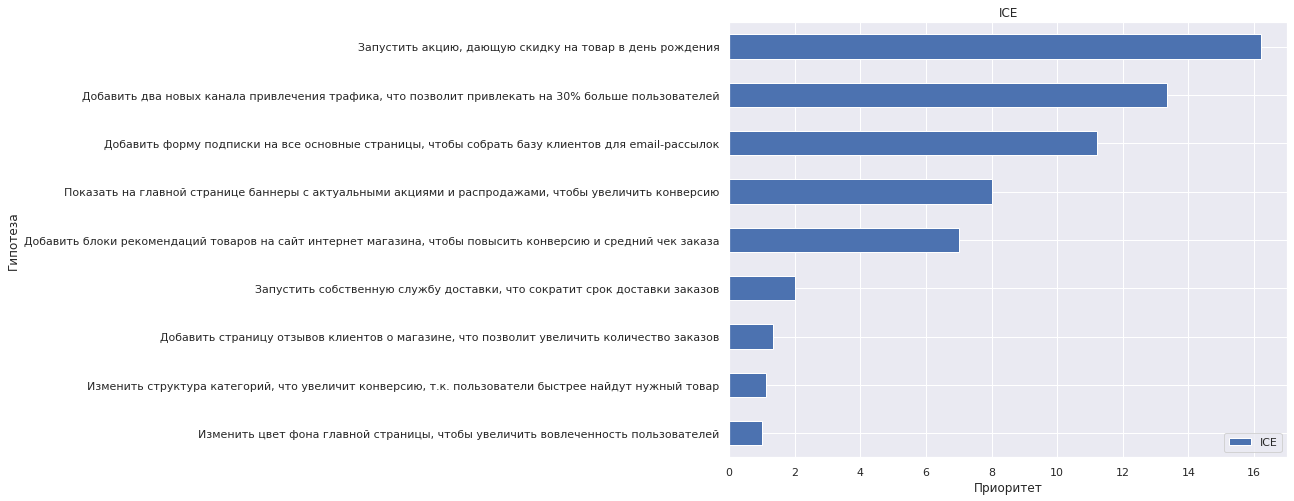

In [18]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

**1.2 Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [19]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


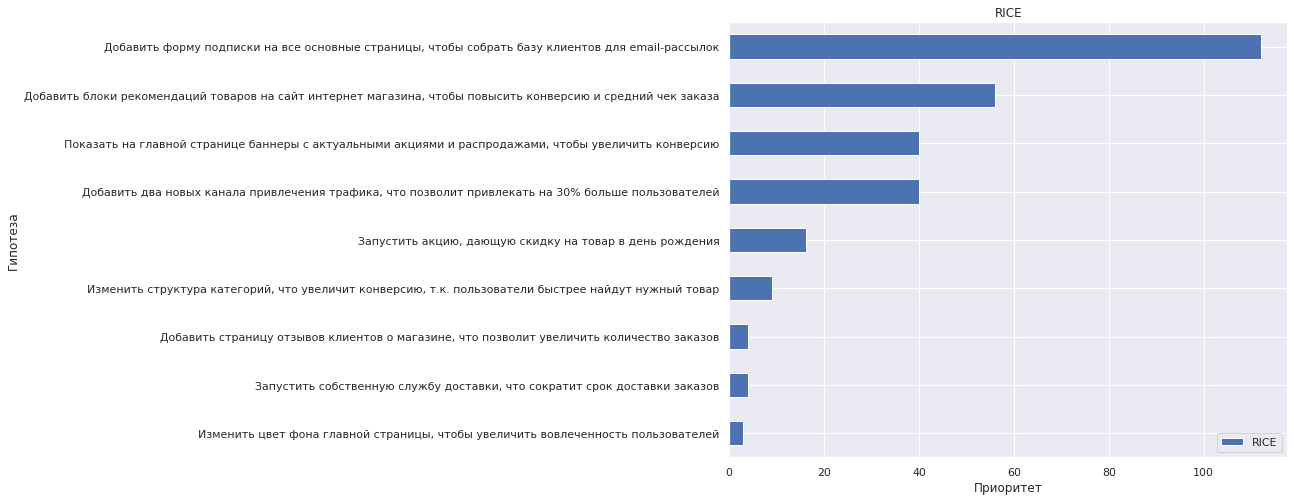

In [20]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

**1.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

In [21]:
display(hypothesis[['hypothesis', 'ICE','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000,3.0


Так произошло, потому в RICE помимо достижимости, дешевизны тестирование оценивается еще и объем пользователей, которых затронет изменение.

**Вывод по части 1**

В приоритизации по ICE в топе 3 гипотезы № 8, 0, 7
В приоритизации по RICE в топе 4 гипотезы № 7, 2, 0, 6

Разница фреймворков в том, что в RICE оценивается еще и число пользователей, которых затронут изменения. Поэтому вывод по приоритизации надо делать исходя из обоих результатов. 

То есть гипотеза 7, например, в явном приоритете по обоим фреймворкам, так как не только сильно повлияет на пользователей и их удовлетворение продуктом, сравнительна дешевая в тестировании, но еще и затронет бОльшее число пользователей. Поэтому именно с нее и стоит начать. 

Итого гипотезы в порядке приоритета:

1. Гипотеза № 7 *-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*
2. Гипотеза № 0 *-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*
3. Гипотеза № 2 *-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа*
4. Гипотеза № 8 *-Запустить акцию, дающую скидку на товар в день рождения*
5. Гипотеза № 6 *-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*
6. Гипотеза № 3 *-Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар*
7. Гипотеза № 5 *-Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов*
8. Гипотеза № 4 *-Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей*

# Часть 2. Анализ A/B-теста
Провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv

**Задача проанализировать A/B-тест**

Для начала посмотрим на распределение данных, период тестирования, размеры групп в выборке

In [22]:
#определим дату конца А/В тестирования
print(orders['date'].max())
print(visitors['date'].max())

2019-08-31 00:00:00
2019-08-31 00:00:00


In [23]:
#определим дату старта А/В тестирования
print(orders['date'].min())
print(visitors['date'].min())

2019-08-01 00:00:00
2019-08-01 00:00:00


In [24]:
#посмотрим сколько пользователей было в группах
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
#оценим общее число покупок
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


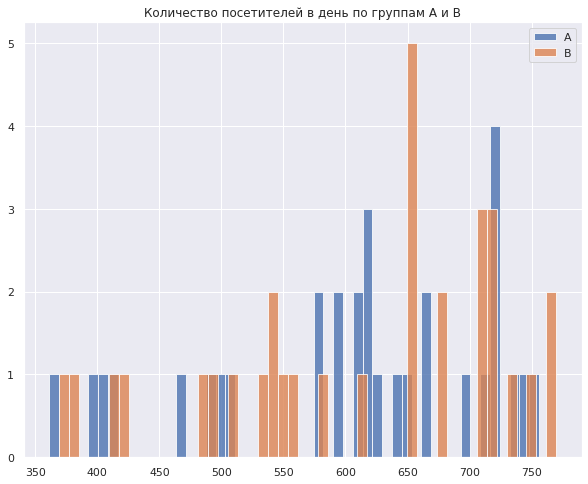

P-value:0.7301376549390499
Разница в количестве посетителей в группах A и B статистически НЕ значима

Начальная конверсия: 0.034
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121

Вводим начальную конверсию и полученное относительное изменение конверсии в калькулятор
Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.htmlПолучаем необходимое количество выборки 35855 для корректного проведения тестирования
В нашем случае количество 37652 посещений
Кол-во выборки для A/B тестирования корректно подобрано, статистически значимой разницы
в количестве посещений между группами не обнаружено




In [25]:
#оценим конверсию и корректность числа пользователей дла А В тестирования
plt.hist(visitors[visitors['group']=='A']['visitors'], alpha = 0.8, label='A', bins = 50)
plt.hist(visitors[visitors['group']=='B']['visitors'], alpha = 0.8, label='B', bins = 50)
plt.legend()
plt.title('Количество посетителей в день по группам A и B')
plt.show()
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')

start_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
final_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print('Начальная конверсия: {:.3f}'.format(final_conversion))
print('Полученная после изменений конверсия: {:.3f}'.format(final_conversion))
print('Относительное изменение конверсии после изменений: {:.3f}'.format(abs(1-(start_conversion/final_conversion))))
print('\nВводим начальную конверсию и полученное относительное изменение конверсии в калькулятор\n'
     'Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html'
     'Получаем необходимое количество выборки 35855 для корректного проведения тестирования\n'
     'В нашем случае количество {} посещений\n'
      'Кол-во выборки для A/B тестирования корректно подобрано, ' 
      'статистически значимой разницы\nв количестве посещений между группами не обнаружено\n\n'.format(visitors['visitors'].sum()))

**2.1** Построим график кумулятивной выручки по группам. Сделаем выводы и предположения. Создадим датафрейм orders_grouped с уникальными парами значений 'date' и 'group'

In [26]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [27]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index() 

In [28]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

**Посчитаем куммулятивную выручку**

In [29]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [30]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


**Построим график кумулятивной выручки**

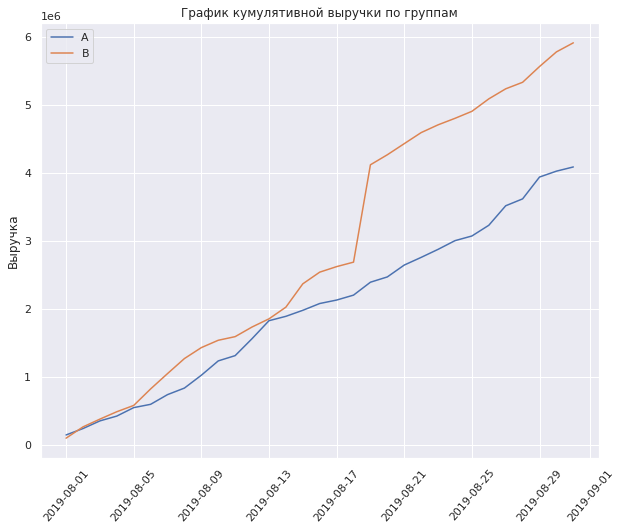

In [31]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=50)
plt.legend()
plt.show()

**Вывод по анализу кумулятивной выручки**

В целом выручка с группы В выше, чем с А. В период с 1 августа по 8 августа выручка обеих групп была на равне, но дальше группа В выросла.
18-19 августа произошел резкий скачок роста выручки у группы А - необходимо проверить, есть ли аномальные значения в данных или выбросы.

**2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

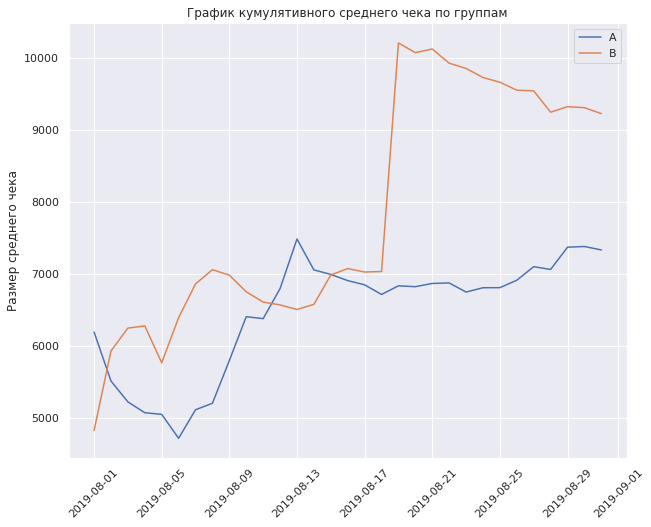

In [32]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]

#составим график на основе полученных данных
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Размер среднего чека")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод по анализу кумулятивного среднего чека** 

В целом средний чек по группе B выше. 
Но опять в группе В виден аномальный рост на 18-19 августа по среднему чеку - значит скорее всего что-то не так в данных по оплате заказов, и выбросы по выручке были из-за этого. С 20-21 августа данные выровнялись, средний чек группы В остался в пределах 9-10 тысяч до конца тестирования.
Группа А показывает результат хуже, был резкий спад 6 августа, далее чек рос до 13 числа (и вырос до 7500). После-стабилизировался в пределах (6800-7500)

**2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

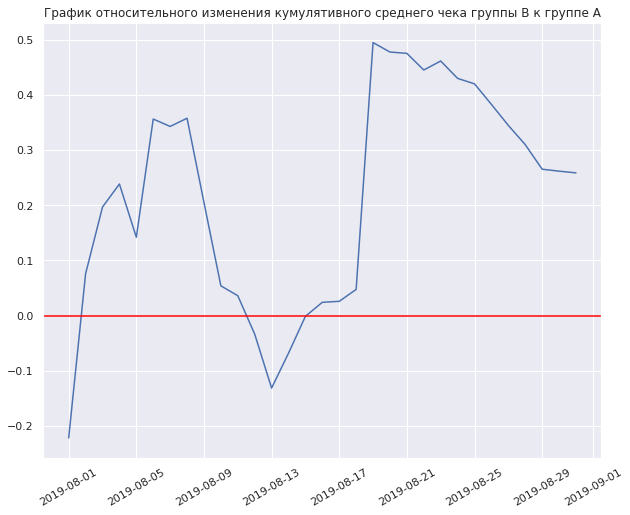

In [33]:
avg_bill = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(avg_bill['date'], avg_bill['average_check_B'] / avg_bill['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=30)
plt.show()

**Вывод по анализу относительного изменения кумулятивного среднего чека группы B к группе A**

В нескольких точках график различия между сегментами резко «скачет», значит в данных по оплатам есть аномалии и выбросы. Резкие скачки например есть 2, 6 и 18 августа

**2.4 Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#исправлено
#куммулятивное среднее число заказов
data['order_per_visitorA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA'] 
data['order_per_visitorB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB'] 

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,order_per_visitorA,order_per_visitorB
0,2019-08-01,20,148579,21,101217,20,148579,21,101217,719,713,719,713,0.027816,0.029453
1,2019-08-02,19,93822,24,165531,39,242401,45,266748,619,581,1338,1294,0.029148,0.034776
2,2019-08-03,24,112473,16,114248,63,354874,61,380996,507,509,1845,1803,0.034146,0.033833
3,2019-08-04,15,70825,17,108571,78,425699,78,489567,717,770,2562,2573,0.030445,0.030315
4,2019-08-05,25,124218,23,92428,103,549917,101,581995,756,707,3318,3280,0.031043,0.030793


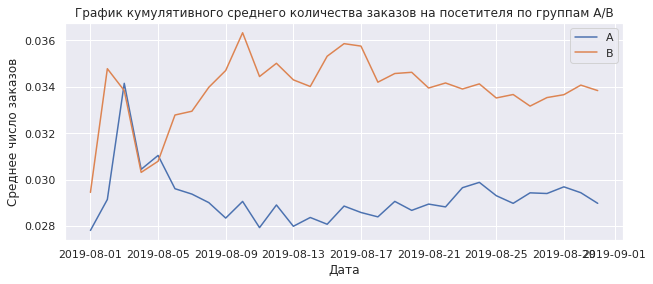

In [35]:
plt.figure(figsize=(10,4))
plt.plot(data['date'], data['order_per_visitorA'], label='A')
plt.plot(data['date'], data['order_per_visitorB'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов')
plt.legend()
plt.show()

**Вывод по анализу кумулятивного среднего количества заказов на посетителя по группам**

На графике видно, что группа В лучше группы А по куммулятивному среднему количству заказов. У обеих групп был всплеск значений 2-3 августа, далее он упал. После 5 августа у обеих групп показатели стаблизировались. У группы В он остался в пределах 0.33-0.36, у группы А 0.31-0.28. Разница не большая, но группа В лидирует.

**2.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения**

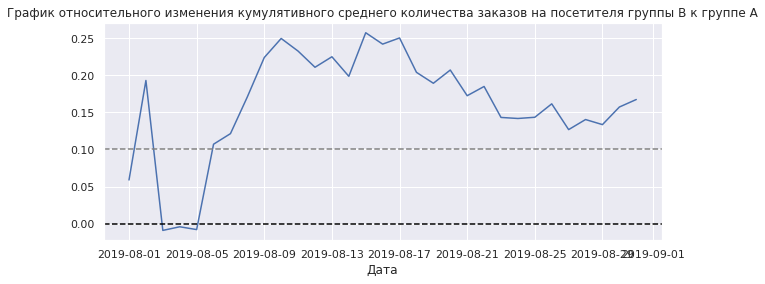

In [36]:
plt.figure(figsize=(10,4))
plt.plot(data['date'], ((data['order_per_visitorB']/data['order_per_visitorA'])-1))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

**Вывод по анализу относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

Группа В показывает лучшие результаты относительно А. Был период когда у А и В 2-3 августа не было заказов. Но с 6 числа и до конца теста - группа В была в лидерах.

**2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [37]:
#посчитаем среднее число заказов на покупателя
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
orders_per_user.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


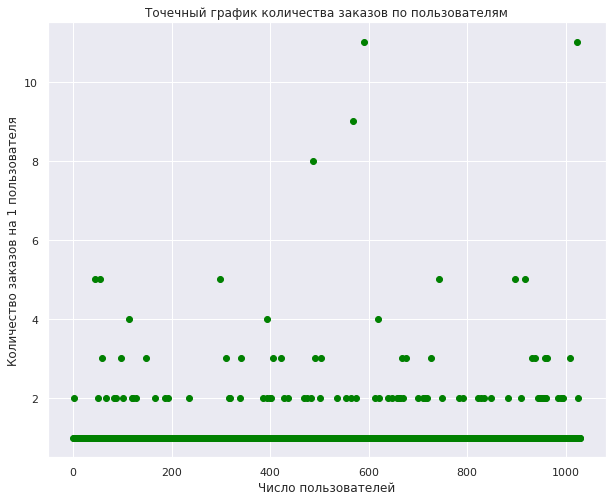

In [38]:
#создадим график 
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='green')
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Количество заказов на 1 пользователя')
plt.show()

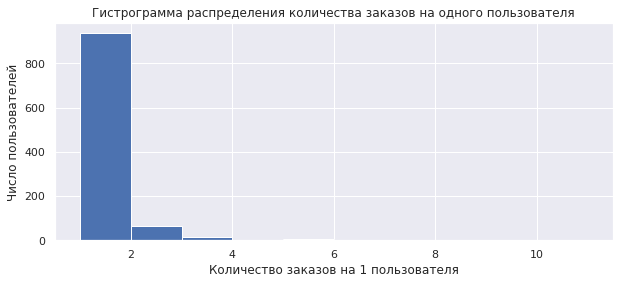

In [39]:
plt.figure(figsize=(10,4))
plt.hist(orders_per_user['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.ylabel('Число пользователей')
plt.xlabel('Количество заказов на 1 пользователя')
plt.show()
plt.show()

**Вывод по анализу графика количества заказов по пользователям.**

В основном каждый покупатель делает по 1 заказу, меньше 50 пользователей делают 2 заказа, 3 заказа сделали менее 10 человек. Есть единичные случаи, когда заказов пользователь делал больше 4х.

**2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [40]:
print('95 перцентиль: %.2f' %(np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' %(np.percentile(orders_per_user['orders'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


Проверим распределение значений количества заказов

In [41]:
orders_per_user['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

**Вывод по анализу 95-й и 99-й перцентили количества заказов на пользователя**

То есть в среднем 1 заказ на 1 посетителя. Менее 5% делают 3 заказа. И менее 1% сделали от 4х заказов (максимум 11), то есть выбросов в данных всего на 1%

**2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

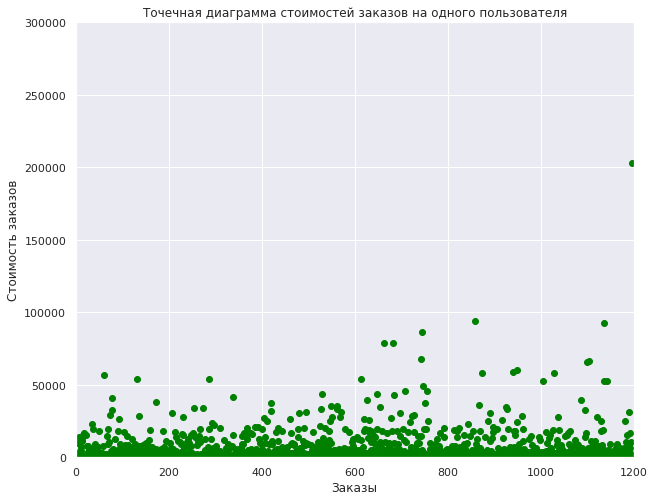

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='green')
plt.title('Точечная диаграмма стоимостей заказов на одного пользователя')
plt.ylabel('Стоимость заказов')
plt.xlabel('Заказы')
plt.axis([0, 1200, 0, 300000])
plt.show()

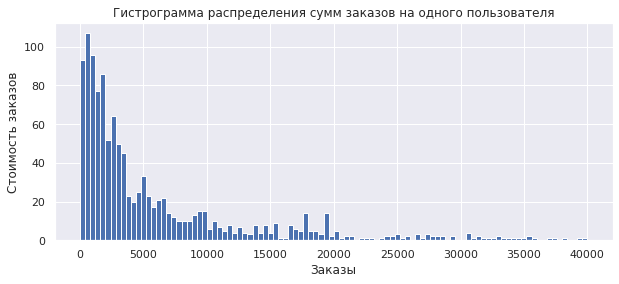

In [43]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,40000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.show()

Посмотрим данные по диаграмм размаха или ящику с усами.

(-50.0, 60000.0)

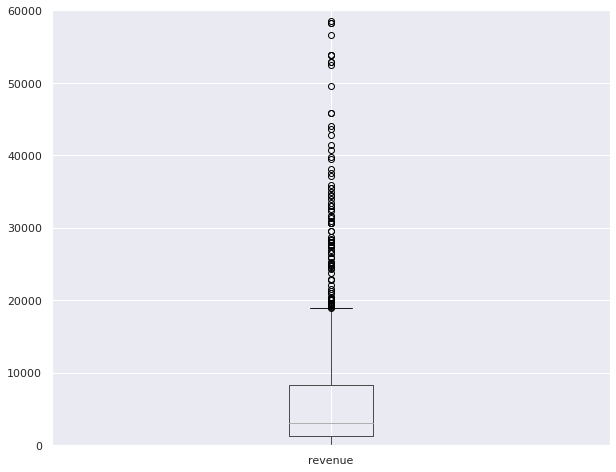

In [44]:
orders.boxplot(column=['revenue']) 
plt.ylim(-50, 60000) 

In [45]:
#какие в целом показатели значений в столбце
print("Средняя стоимость заказа", round(orders['revenue'].mean(),2))
print("Медианная стоимость заказа", round(orders['revenue'].median(),2))
print("Максимальная стоимость заказа", round(orders['revenue'].max(),2))
print("Минимальная стоимость заказа", round(orders['revenue'].min(),2))

Средняя стоимость заказа 8348.01
Медианная стоимость заказа 2978.0
Максимальная стоимость заказа 1294500
Минимальная стоимость заказа 50


**Вывод по анализу стоимостей заказов**

По точечной диаграмме видны выбросы заказов на сумму от 75К. Большая часть заказов не превышает 25К. По диаграмме размаха видно, что нормальное распрделение до 19К. Средний чек на 1 пользователя очень сильно разнится, на столько сильно, что например минимальный заказ-50, а максимальный 1 294 500, вместе это дает ненормальное распределение.

**2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [46]:
#посчитаем перцентили
print('90 перцентиль: %.2f' %(np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' %(np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' %(np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


**Вывод по перцентилям стоимости заказов**

Около 5% стоимостей заказов на много выше медианного значения. Это в полне возможно из-за большой разницы в сумме, какой-то заказ на 50 рублей, а какой-то на 9950, а в среднем они дали 5 тысяч. Не более 1%: сделали заказ на сумму выше 58К. Все, что выше 99 перцентиля - это аномальные значения.

**2.10 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Оценим сырые, неочищенные от выбросов и аномалий данные. 

Гипотезы: 
- Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет. (Принимаем, в случае если полученный результат > p-value)
- Альтернативная гипотеза: различия в среднем количестве заказов на посетителя  между группами есть. 

**P-value = 0.05**

In [47]:
#заказы группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
#заказы группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

#зададим переменные sampleA, sampleB 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#sample A
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#sample B
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный выигрыш группы B равен {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value 0.01679
Относительный выигрыш группы B равен 0.138


**Вывод по статистической значимости различий в среднем количестве заказов на посетителя в *сырых* данных** 
Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 
Первое число — p-value = 0.016, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем. Относительный выигрыш группы B по сравнению с группой А равен 13.8%. 

**2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Гипотезы

- Нулевая гипотеза: различий в среднем чеке между группами нет. (Принимаем, в случае если полученный результат > p-value) 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

**p-value = 0.05**

In [48]:
print('P-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие среднего чека группы В от группы А {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value 0.729
Различие среднего чека группы В от группы А 0.259


In [49]:
print("Средняя сумма заказа на посетителя в группе А", orders[orders['group']=='A']['revenue'].mean())

Средняя сумма заказа на посетителя в группе А 7333.578096947936


In [50]:
print("Средняя сумма заказа на посетителя в группе В",orders[orders['group']=='B']['revenue'].mean())

Средняя сумма заказа на посетителя в группе В 9230.875


**Вывод по анализу статистической значимости различий в среднем чеке заказа**

Первое число — p-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказов между группами нет, не отвергаем. 

Анализ сырых данных показал, что разница в среднем значении суммы заказа на 1 покупателя статистически не значима. Относительная разница группы В в средней сумме заказа составляет примерно 25,9% 

**2.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Сначала очистим данные. Перцентиль показал 5% - 2 заказа на пользователя, 1% - 4 заказа. То есть все что больше 4 заказов выбросы. По среднему чеку заказов: 95й перцентиль - 28 000, 99й-58 233. Не более 1%: сделали заказ на сумму выше 58К. Все, что выше 99 перцентиля - это аномальные значения. Узнаем сколько всего аномальных заказов.

In [51]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
print(usersWithManyOrders)
print("Число пользователей с аномально высоким к-вом заказов:", len(usersWithManyOrders))

227    2038680547
278    2458001652
499    4256040402
326    2378935119
340    2458001652
Name: userId, dtype: int64
Число пользователей с аномально высоким к-вом заказов: 5


Итого: 5 пользователей с аномальными значениями среднего числа заказов. Зададим аномальные значения в abnormalUsers и очистим от них данные.

In [52]:
abnormalUsers = (
    pd.concat([usersWithManyOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Гипотезы:** 
- Нулевая гипотеза: различий в среднем количестве заказов на посетителя *по отфильтрованным данным* между группами нет. (Принимаем, в случае если полученный результат > p-value)
- Альтернативная гипотеза: различия в среднем количестве заказов *по отфильтрованным данным* на посетителя  между группами есть. 

**P-value = 0.05**

In [54]:
print('P-value {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный выигрыш группы B равен {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value 0.016
Относительный выигрыш группы B равен 0.149


**Вывод по количеству заказов в очищенных данных по числу заказов на 1 пользователя**
В неочищенных данных P-value - 0.01679, меньше 0.05. Относительный выигрыш группы B равен 13.8. 

В очищенных данных p-value 0.012 уменьшился, это еще раз подтверждает, что "Нулевую гипотезу различий в среднем количестве заказов на посетителя *по отфильтрованным данным* между группами нет." - *отвергаем*  Группа В имеет больший показатель количества заказов группы А на 17%

**2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Для начала отсортируем данные. Перцентили показали 95% - 28 000, 99%-58233.2. На диаграмме размаха и точечном графике видно, что разброс минимальной, максимальной суммы высок, медианная - 2978, поэтому уберем заказы выше 58234, если вощьмем ниже- то сильно смажем данные из-за большой разницы

И проверим статистическую значимость различий в среднем чеке между сегментами по "очищенным данным". 

**Гипотезы**

- Нулевая гипотеза: различий в среднем чеке *по очищенным данным* между группами нет. (Принимаем, в случае если полученный результат > p-value) 
- Альтернативная гипотеза: различия в среднем чеке *по очищенным данным* между группами есть. 

**p-value = 0.05**

In [55]:
orders_filtered = orders.query('revenue <= 58234')
alpha = 0.05
results = st.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'])
pvalue = results.pvalue
print('p value: ', pvalue)
if (pvalue > alpha):
    print("Принимаем H0: Нулевая гипотеза: различий в среднем чеке по очищенным данным между группами нет.")
else:
    print("Различия в среднем чеке по очищенным данным между группами есть.")

print('Различие среднего чека группы В от группы А {0:.3f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].mean()/orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1))

p value:  0.6208626966847455
Принимаем H0: Нулевая гипотеза: различий в среднем чеке по очищенным данным между группами нет.
Различие среднего чека группы В от группы А 0.019


In [56]:
print(orders_filtered.head(5))
print(orders_filtered.shape[0]) 

   transactionid   visitorid       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
1185


In [57]:
#проверим процент очищаемых данных относительно общего числа покупок
differ = round(orders_filtered.shape[0] * 100/ len(orders['revenue']),2)
print(differ)

99.0


Всего покупателей 1197, после очистки останется 1185. Итого мы уберем 12 заказов, что составляет 1% от данных. Прорверим как теперь выглядит средний чек

In [58]:
print("Средняя сумма заказа на посетителя в группе А", orders_filtered[orders_filtered['group']=='A']['revenue'].mean())

Средняя сумма заказа на посетителя в группе А 6470.587272727273


In [59]:
print("Средняя сумма заказа на посетителя в группе А", orders_filtered[orders_filtered['group']=='B']['revenue'].mean())

Средняя сумма заказа на посетителя в группе А 6592.692913385827


Результаты сильно изменились по разнице среднего чека. По неочищенным данным P-value был 0.729, различие среднего чека группы В от группы А 25,9%. Сейчас p-value 0.62, различие среднего чека группы В от группы А 1,9%. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

**2.14 Примите решение по результатам теста и объясните его.**

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Для анализа были взяты 37 652 пользователя, необходимо было 35 855. То есть для анализа взято досттаточное число пользователей.
*Выводы по анализу*

Анализ статистической значимости показал:

- Статистическая значимость различия количества заказов на посетителя по сырым данным есть. Даже после фильтрации данных от аномальных значений показатели не сильно изменились. А показатель разницы количества заказов группы В относительно А вырос с 13.8% до 17%

- Различия среднего чек ни по сырым данным, ни по очищенным не имеет статистической значимости. Разница в среднем чеке группы В относительно группы А до очистки данных - 25.9%, после - 1.9%. В группе В был высокий % выбросов аномальных заказов.


*Общий вывод: тест можно приостановить и признать его успешным. Группа В успешнее, чем группа А. При относительно равных чеках, конверсия из посетителя в покупателя у группы В - выше на 3,2%.*